**(1) Firest Fires**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df = pd.read_csv("/content/forestfires (1).csv")
pd.set_option('display.max_columns',None)
df

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...     ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0   

     daymon  daysat  daysun  daythu  daytue  daywed  monthapr  monthaug  \
0         0       0       0       0       0       0         0         0   
1         0       0       0       0       1       0         0         0   
2         0       1       0       0       0       0         0         0   
3         0       0       0       0       0       0         0         0   
4         0       0       1       0       0       0         0         0   
..      ...     ...     ...     ...     ...     ...       ...       ...   
512       0       0       1       0       0       0         0         1   
513       0       0       1       0       0       0         0         1   
514       0       0       1       0       0       0         0         1   
515       0       1       0       0       0       0         0         1   
516       0       0       0       0       1       0         0         0   

     monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
0           0         0         0         0         0         1         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         0         1         0   
4           0         0         0         0         0         1         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         0   

     monthnov  monthoct  monthsep size_category  
0           0         0         0         small  
1           0         1         0         small  
2           0         1         0         small  
3           0         0         0         small  
4           0         0         0         small  
..        ...       ...       ...           ...  
512         0         0         0         large  
513         0         0         0         large  
514         0         0         0         large  
515         0         0         0         small  
516         1         0         0         small  

[517 rows x 31 columns]

In [5]:
df.drop(df.columns[11:-1], axis=1,inplace= True)
df.describe()


FFMC         DMC          DC         ISI        temp          RH  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean    90.644681  110.872340  547.940039    9.021663   18.889168   44.288201   
std      5.520111   64.046482  248.066192    4.559477    5.806625   16.317469   
min     18.700000    1.100000    7.900000    0.000000    2.200000   15.000000   
25%     90.200000   68.600000  437.700000    6.500000   15.500000   33.000000   
50%     91.600000  108.300000  664.200000    8.400000   19.300000   42.000000   
75%     92.900000  142.400000  713.900000   10.800000   22.800000   53.000000   
max     96.200000  291.300000  860.600000   56.100000   33.300000  100.000000   

             wind        rain         area  
count  517.000000  517.000000   517.000000  
mean     4.017602    0.021663    12.847292  
std      1.791653    0.295959    63.655818  
min      0.400000    0.000000     0.000000  
25%      2.700000    0.000000     0.000000  
50%      4.000000    0.000000     0.520000  
75%      4.900000    0.000000     6.570000  
max      9.400000    6.400000  1090.840000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [7]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [8]:
df.duplicated().sum()

8

In [9]:
df[df.duplicated(keep=False)]

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
52    aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0   0.00   
53    aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0   0.00   
99    aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0   0.00   
100   aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0   0.00   
214   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  28.66   
215   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  28.66   
302   jun  fri  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0   0.00   
303   jun  fri  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0   0.00   
425   aug  thu  91.6  248.4  753.8   6.3  20.4  56   2.2   0.0   0.00   
426   aug  thu  91.6  248.4  753.8   6.3  20.4  56   2.2   0.0   0.00   
460   aug  sat  93.7  231.1  715.1   8.4  18.9  64   4.9   0.0   0.00   
461   aug  sat  93.7  231.1  715.1   8.4  18.9  64   4.9   0.0   0.00   
500   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00   
501   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00   
507   aug  fri  91.0  166.9  752.6   7.1  25.9  41   3.6   0.0   0.00   
508   aug  fri  91.0  166.9  752.6   7.1  25.9  41   3.6   0.0   0.00   

    size_category  
52          small  
53          small  
99          small  
100         small  
214         large  
215         large  
302         small  
303         small  
425         small  
426         small  
460         small  
461         small  
500         small  
501         small  
507         small  
508         small

In [10]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [11]:
cat_cols = df.select_dtypes(object).columns
oe = OrdinalEncoder()
df[cat_cols] = oe.fit_transform(df[cat_cols])
df

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
0      7.0  0.0  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00   
1     10.0  5.0  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00   
2     10.0  2.0  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00   
3      7.0  0.0  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00   
4      7.0  3.0  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00   
..     ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...   
512    1.0  3.0  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44   
513    1.0  3.0  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29   
514    1.0  3.0  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16   
515    1.0  2.0  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00   
516    9.0  5.0  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00   

     size_category  
0              1.0  
1              1.0  
2              1.0  
3              1.0  
4              1.0  
..             ...  
512            0.0  
513            0.0  
514            0.0  
515            1.0  
516            1.0  

[509 rows x 12 columns]

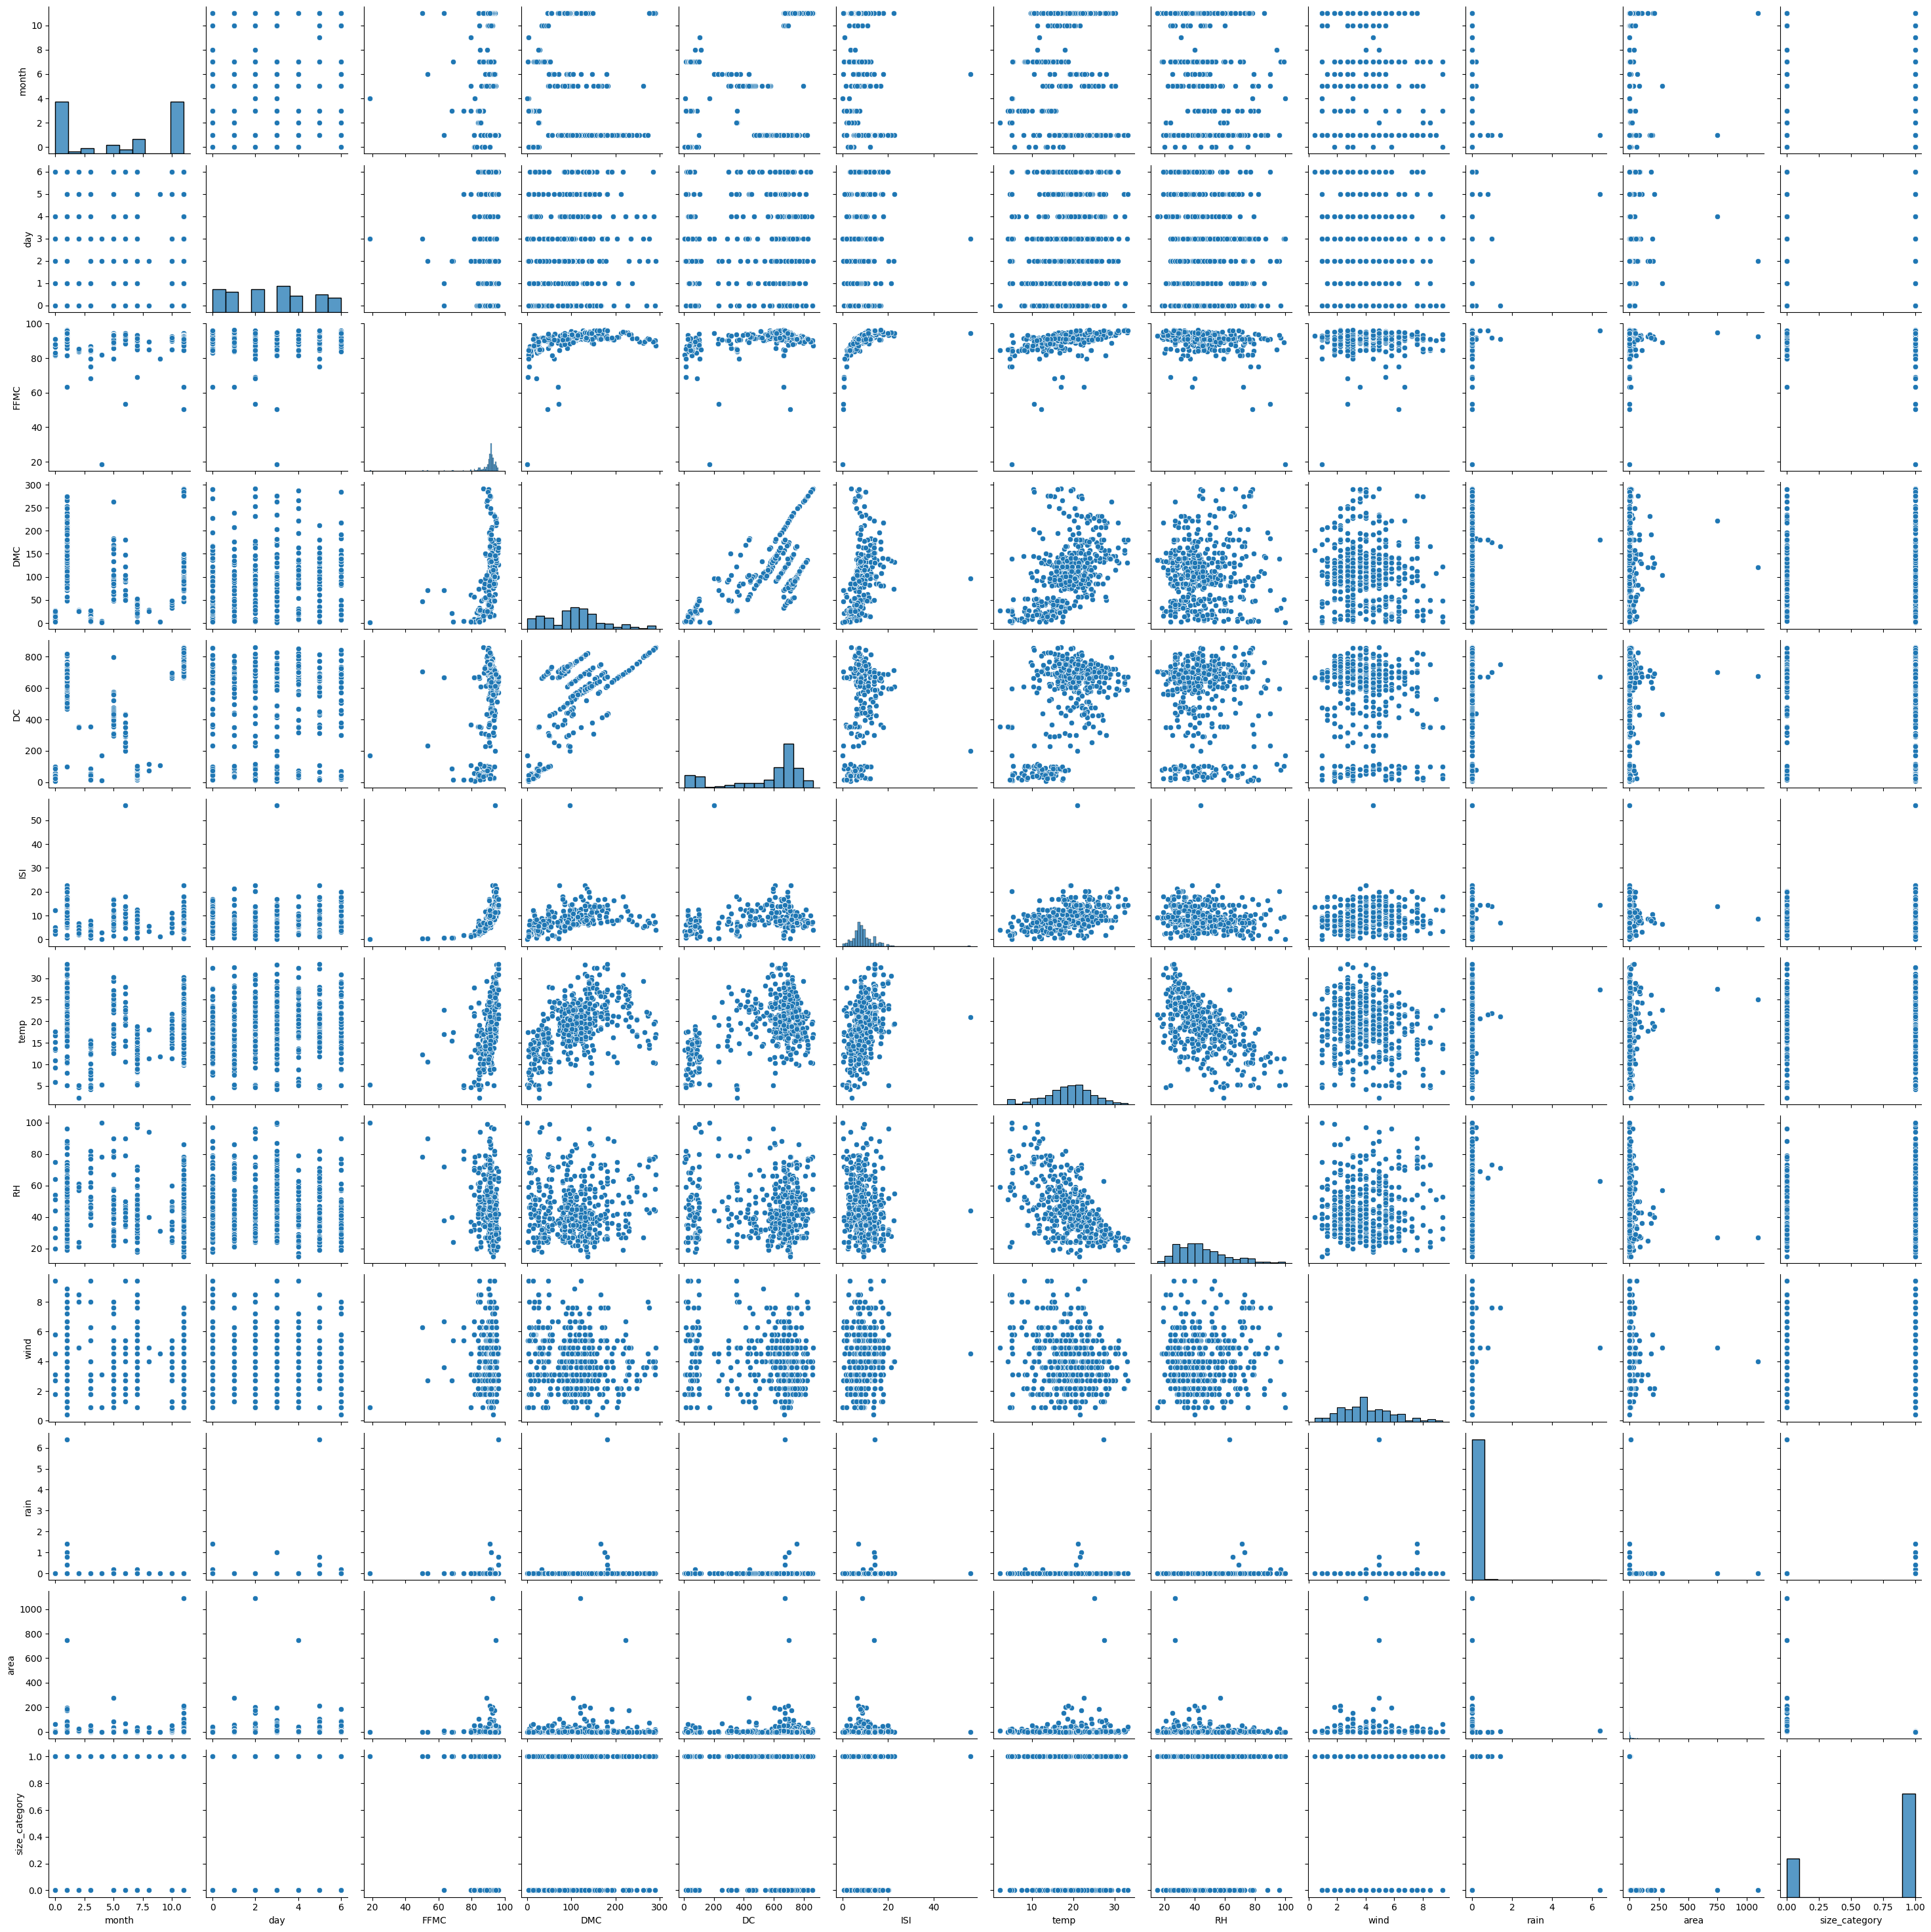

In [12]:
sns.pairplot(df)

<Axes: >

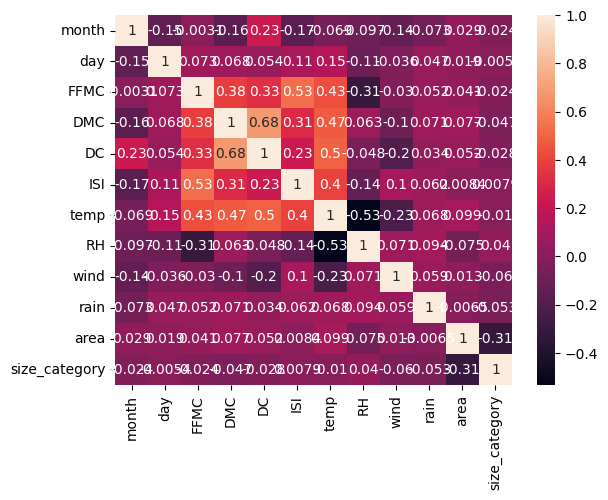

In [13]:
sns.heatmap(df.corr(),annot=True)


In [14]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [15]:
sc = StandardScaler()
x = sc.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(x,
                                                y,
                                                test_size=0.25,
                                                random_state=2)

In [16]:
# Initialize ann model
ann = Sequential()

# Add hidden data
ann.add(Dense(units=30, activation='relu'))
ann.add(Dense(units=20, activation='relu'))
ann.add(Dense(units=30, activation='relu'))

# Add output layer
ann.add(Dense(units=1, activation='sigmoid'))

# Establish the connection between Layers
ann.compile(optimizer='adam', loss='binary_crossentropy')

In [17]:
model = ann.fit(xtrain, ytrain,validation_data=(xtest,ytest), epochs=500)


Epoch 1/500
12/12 [==============================] - 1s 22ms/step - loss: 0.6895 - val_loss: 0.6442
Epoch 2/500
12/12 [==============================] - 0s 5ms/step - loss: 0.6264 - val_loss: 0.6216
Epoch 3/500
12/12 [==============================] - 0s 6ms/step - loss: 0.5953 - val_loss: 0.6115
Epoch 4/500
12/12 [==============================] - 0s 6ms/step - loss: 0.5748 - val_loss: 0.6033
Epoch 5/500
12/12 [==============================] - 0s 5ms/step - loss: 0.5597 - val_loss: 0.5939
Epoch 6/500
12/12 [==============================] - 0s 5ms/step - loss: 0.5454 - val_loss: 0.5810
Epoch 7/500
12/12 [==============================] - 0s 5ms/step - loss: 0.5313 - val_loss: 0.5698
Epoch 8/500
12/12 [==============================] - 0s 5ms/step - loss: 0.5202 - val_loss: 0.5582
Epoch 9/500
12/12 [==============================] - 0s 5ms/step - loss: 0.5072 - val_loss: 0.5539
Epoch 10/500
12/12 [==============================] - 0s 5ms/step - loss: 0.4964 - val_loss: 0.5411
Epoch 11

In [18]:
ypred = ann.predict(xtest)
ypred = ypred > 0.5
ypred

4/4 [==============================] - 0s 4ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [

In [19]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.97      0.90      0.93        39
         1.0       0.96      0.99      0.97        89

    accuracy                           0.96       128
   macro avg       0.96      0.94      0.95       128
weighted avg       0.96      0.96      0.96       128



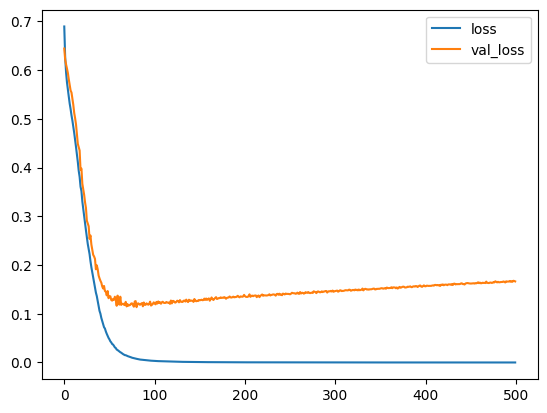

In [20]:
val_loss = pd.DataFrame(model.history)
plt.plot(val_loss)
plt.legend(val_loss)

**Hyperparameter tuning**

In [22]:
# Early Stopping
early = EarlyStopping(monitor= 'val_loss', mode='min', patience=10)


In [23]:
# Initialize ann model
ann = Sequential()

# Add hidden data
ann.add(Dense(units=30, activation='relu'))
ann.add(Dense(units=20, activation='relu'))
ann.add(Dense(units=30, activation='relu'))

# Add output layer
ann.add(Dense(units=1, activation='sigmoid'))

# Establish the connection between Layers
ann.compile(optimizer='adam', loss='binary_crossentropy')

# Fit data
model = ann.fit(xtrain, ytrain,callbacks=[early], validation_data=(xtest, ytest), epochs=500)

# Make Predictions
ypred = ann.predict(xtest)

Epoch 1/500
12/12 [==============================] - 1s 18ms/step - loss: 0.6553 - val_loss: 0.6397
Epoch 2/500
12/12 [==============================] - 0s 6ms/step - loss: 0.6158 - val_loss: 0.6205
Epoch 3/500
12/12 [==============================] - 0s 6ms/step - loss: 0.5865 - val_loss: 0.6114
Epoch 4/500
12/12 [==============================] - 0s 6ms/step - loss: 0.5696 - val_loss: 0.6033
Epoch 5/500
12/12 [==============================] - 0s 5ms/step - loss: 0.5528 - val_loss: 0.5959
Epoch 6/500
12/12 [==============================] - 0s 5ms/step - loss: 0.5394 - val_loss: 0.5895
Epoch 7/500
12/12 [==============================] - 0s 5ms/step - loss: 0.5271 - val_loss: 0.5806
Epoch 8/500
12/12 [==============================] - 0s 7ms/step - loss: 0.5168 - val_loss: 0.5685
Epoch 9/500
12/12 [==============================] - 0s 7ms/step - loss: 0.5059 - val_loss: 0.5672
Epoch 10/500
12/12 [==============================] - 0s 6ms/step - loss: 0.4943 - val_loss: 0.5549
Epoch 11

Epoch 1/500
12/12 [==============================] - 2s 18ms/step - loss: 0.7612 - val_loss: 0.6811
Epoch 2/500
12/12 [==============================] - 0s 6ms/step - loss: 0.6863 - val_loss: 0.6511
Epoch 3/500
12/12 [==============================] - 0s 5ms/step - loss: 0.6641 - val_loss: 0.6348
Epoch 4/500
12/12 [==============================] - 0s 5ms/step - loss: 0.6408 - val_loss: 0.6265
Epoch 5/500
12/12 [==============================] - 0s 5ms/step - loss: 0.5996 - val_loss: 0.6211
Epoch 6/500
12/12 [==============================] - 0s 5ms/step - loss: 0.6082 - val_loss: 0.6173
Epoch 7/500
12/12 [==============================] - 0s 5ms/step - loss: 0.5823 - val_loss: 0.6134
Epoch 8/500
12/12 [==============================] - 0s 6ms/step - loss: 0.5926 - val_loss: 0.6096
Epoch 9/500
12/12 [==============================] - 0s 7ms/step - loss: 0.5850 - val_loss: 0.6065
Epoch 10/500
12/12 [==============================] - 0s 9ms/step - loss: 0.5824 - val_loss: 0.6036
Epoch 11

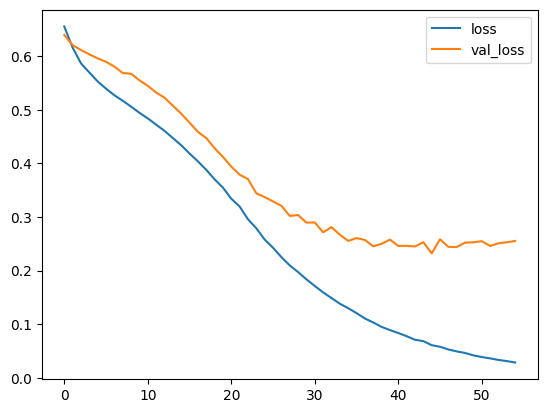

In [25]:
early_loss = pd.DataFrame(model.history)
plt.plot(early_loss)
plt.legend(early_loss)# Drop out layer
# Initialize ann model
ann = Sequential()

# Add hidden data
ann.add(Dense(units=30, activation='relu'))
ann.add(Dropout(rate=0.25))
ann.add(Dense(units=20, activation='relu'))
ann.add(Dropout(rate=0.25))
ann.add(Dense(units=30, activation='relu'))
ann.add(Dropout(rate=0.25))

# Add output layer
ann.add(Dense(units=1, activation='sigmoid'))

# Establish the connection between Layers
ann.compile(optimizer='adam', loss='binary_crossentropy')

# Fit data
model = ann.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=500)

# Make Predictions
ypred = ann.predict(xtest)drop_loss = pd.DataFrame(model.history)
plt.plot(drop_loss)
plt.legend(drop_loss)

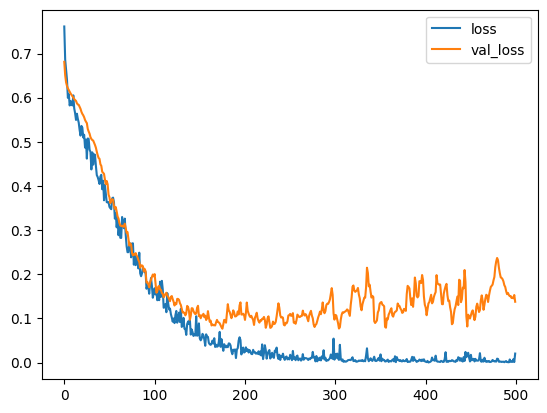

In [26]:
drop_loss = pd.DataFrame(model.history)
plt.plot(drop_loss)
plt.legend(drop_loss)

In [27]:
# Early Stoping + Drop out layer

# Initialize ann model
ann = Sequential()

# Add hidden data
ann.add(Dense(units=30, activation='relu'))
ann.add(Dropout(rate=0.25))
ann.add(Dense(units=20, activation='relu'))
ann.add(Dropout(rate=0.25))
ann.add(Dense(units=30, activation='relu'))
ann.add(Dropout(rate=0.25))

# Add output layer
ann.add(Dense(units=1, activation='sigmoid'))

# Establish the connection between Layers
ann.compile(optimizer='adam', loss='binary_crossentropy')

# Fit data
model = ann.fit(xtrain, ytrain,callbacks=[early], validation_data=(xtest, ytest), epochs=500)

# Make Predictions
ypred = ann.predict(xtest)

Epoch 1/500
12/12 [==============================] - 1s 16ms/step - loss: 0.6782 - val_loss: 0.6510
Epoch 2/500
12/12 [==============================] - 0s 6ms/step - loss: 0.6212 - val_loss: 0.6346
Epoch 3/500
12/12 [==============================] - 0s 5ms/step - loss: 0.6041 - val_loss: 0.6278
Epoch 4/500
12/12 [==============================] - 0s 6ms/step - loss: 0.5880 - val_loss: 0.6250
Epoch 5/500
12/12 [==============================] - 0s 5ms/step - loss: 0.5843 - val_loss: 0.6213
Epoch 6/500
12/12 [==============================] - 0s 5ms/step - loss: 0.5709 - val_loss: 0.6174
Epoch 7/500
12/12 [==============================] - 0s 6ms/step - loss: 0.5737 - val_loss: 0.6155
Epoch 8/500
12/12 [==============================] - 0s 6ms/step - loss: 0.5783 - val_loss: 0.6103
Epoch 9/500
12/12 [==============================] - 0s 5ms/step - loss: 0.5595 - val_loss: 0.6062
Epoch 10/500
12/12 [==============================] - 0s 5ms/step - loss: 0.5433 - val_loss: 0.6014
Epoch 11

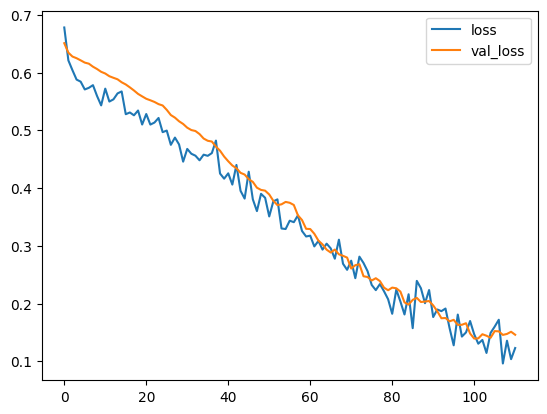

In [28]:
de_loss = pd.DataFrame(model.history)
plt.plot(de_loss)
plt.legend(de_loss)

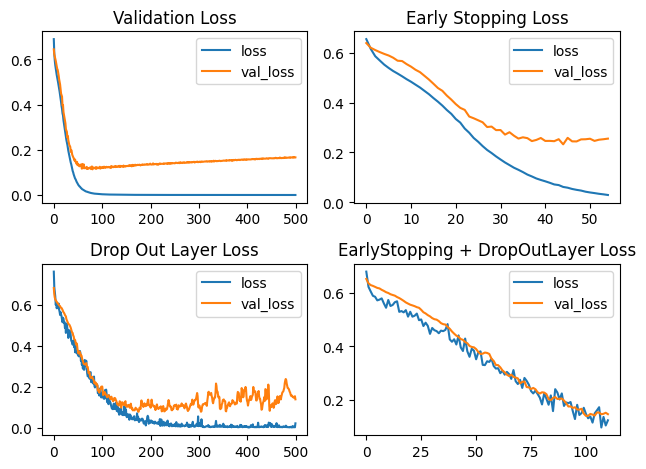

In [29]:
plt.subplot(2,2,1)
plt.plot(val_loss)
plt.legend(val_loss)
plt.title('Validation Loss')

plt.subplot(2,2,2)
plt.plot(early_loss)
plt.legend(early_loss)
plt.title('Early Stopping Loss')

plt.subplot(2,2,3)
plt.plot(drop_loss)
plt.legend(drop_loss)
plt.title('Drop Out Layer Loss')

plt.subplot(2,2,4)
plt.plot(de_loss)
plt.legend(de_loss)
plt.title('EarlyStopping + DropOutLayer Loss')

plt.tight_layout()

**(2) Gas Turbines**

In [32]:
df = pd.read_csv("/content/gas_turbines.csv")
df.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   

       CO     NOX  
0  3.1547  82.722  
1  3.2363  82.776  
2  3.2012  82.468  
3  3.1923  82.670  
4  3.2484  82.311

In [33]:
df.describe().T


count         mean        std          min          25%        50%  \
AT    15039.0    17.764381   7.574323     0.522300    11.408000    18.1860   
AP    15039.0  1013.199240   6.410760   985.850000  1008.900000  1012.8000   
AH    15039.0    79.124174  13.793439    30.344000    69.750000    82.2660   
AFDP  15039.0     4.200294   0.760197     2.087400     3.723900     4.1862   
GTEP  15039.0    25.419061   4.173916    17.878000    23.294000    25.0820   
TIT   15039.0  1083.798770  16.527806  1000.800000  1079.600000  1088.7000   
TAT   15039.0   545.396183   7.866803   512.450000   542.170000   549.8900   
TEY   15039.0   134.188464  15.829717   100.170000   127.985000   133.7800   
CDP   15039.0    12.102353   1.103196     9.904400    11.622000    12.0250   
CO    15039.0     1.972499   2.222206     0.000388     0.858055     1.3902   
NOX   15039.0    68.190934  10.470586    27.765000    61.303500    66.6010   

            75%        max  
AT      23.8625    34.9290  
AP    1016.9000  1034.2000  
AH      90.0435   100.2000  
AFDP     4.5509     7.6106  
GTEP    27.1840    37.4020  
TIT   1096.0000  1100.8000  
TAT    550.0600   550.6100  
TEY    140.8950   174.6100  
CDP     12.5780    15.0810  
CO       2.1604    44.1030  
NOX     73.9355   119.8900

In [34]:
df['TEY'].nunique()


4207

In [35]:
df.shape

(15039, 11)

In [36]:
df.info

<bound method DataFrame.info of            AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583

In [37]:
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [38]:
df.duplicated().sum()

0

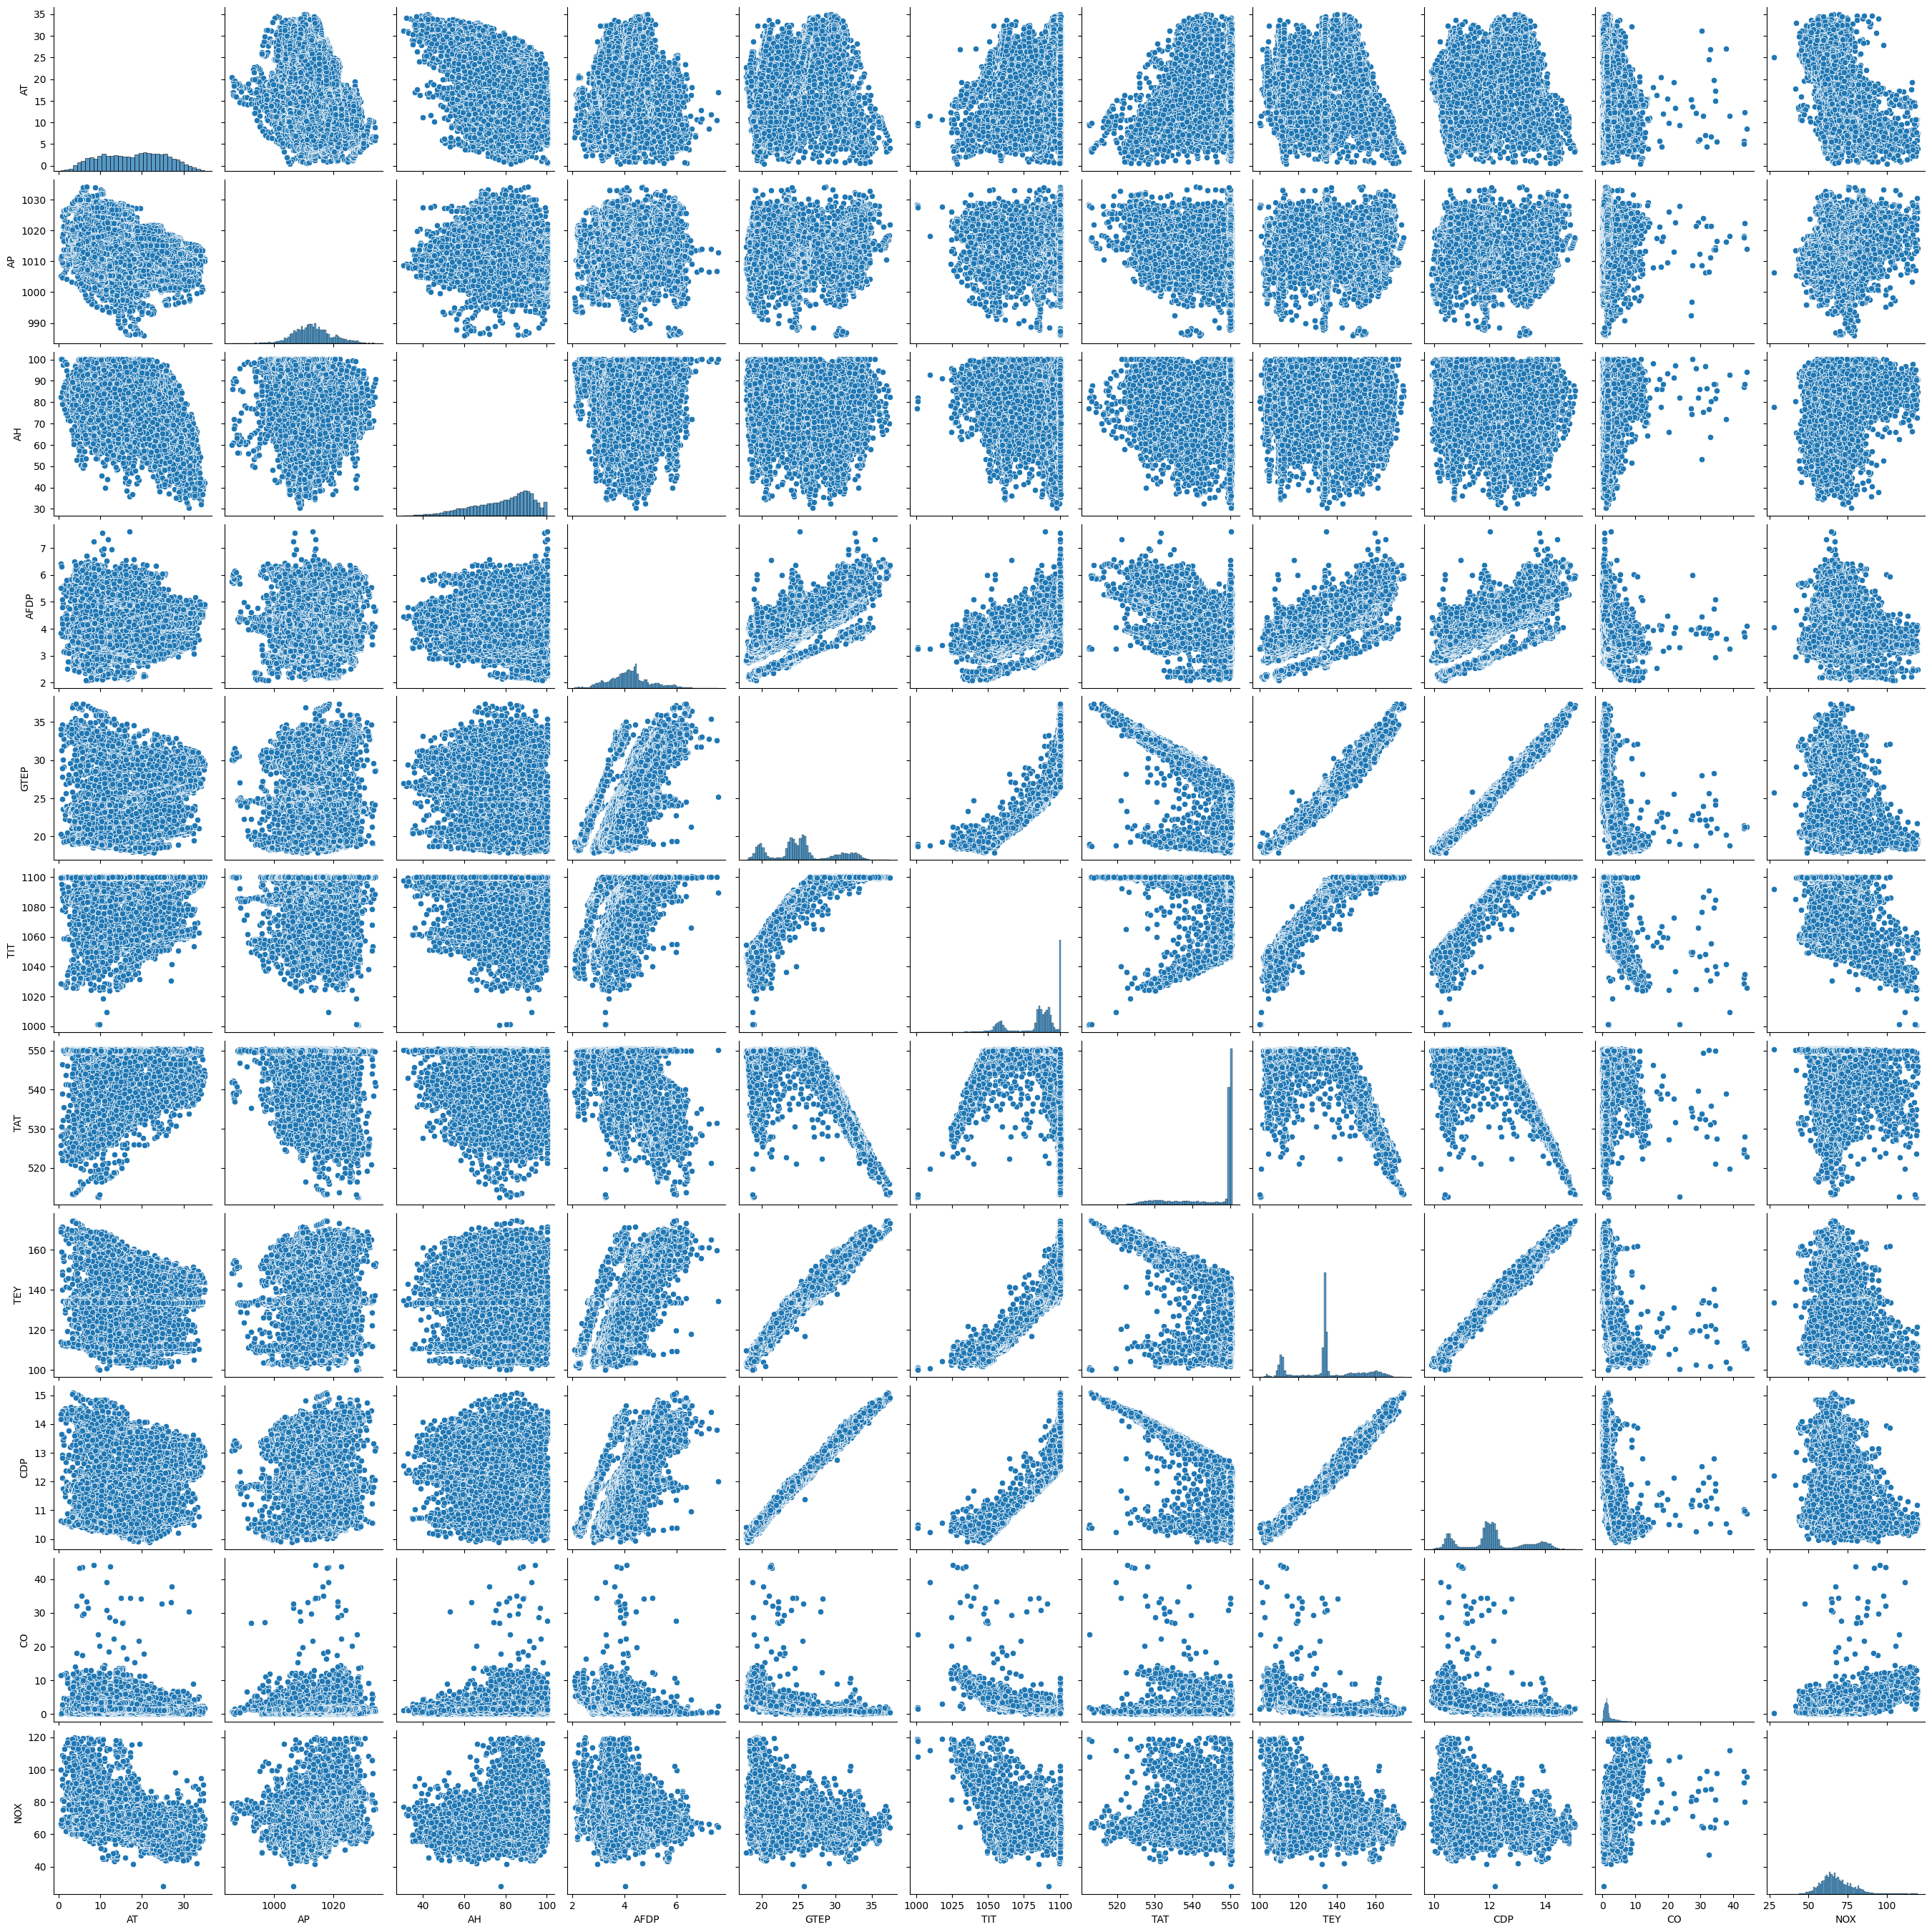

In [39]:
sns.pairplot(df)

<Axes: >

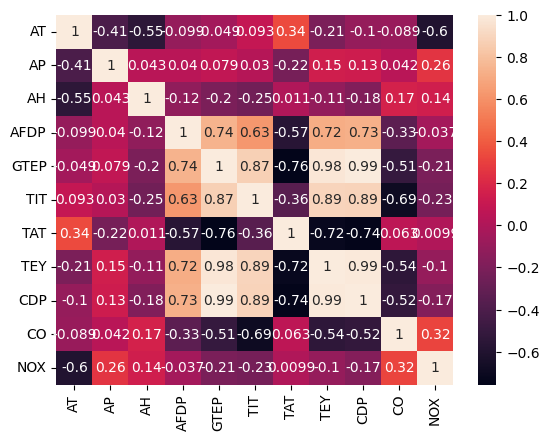

In [40]:
sns.heatmap(df.corr(),annot=True)

In [41]:
df.corr()["TEY"].sort_values(ascending=False)

TEY     1.000000
CDP     0.988473
GTEP    0.977042
TIT     0.891587
AFDP    0.717995
AP      0.146939
NOX    -0.102631
AH     -0.110272
AT     -0.207495
CO     -0.541751
TAT    -0.720356
Name: TEY, dtype: float64

In [42]:
df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [43]:
plt.rcParams['figure.figsize'] = 14,16
plt.rcParams['figure.dpi'] = 250
plt.show()

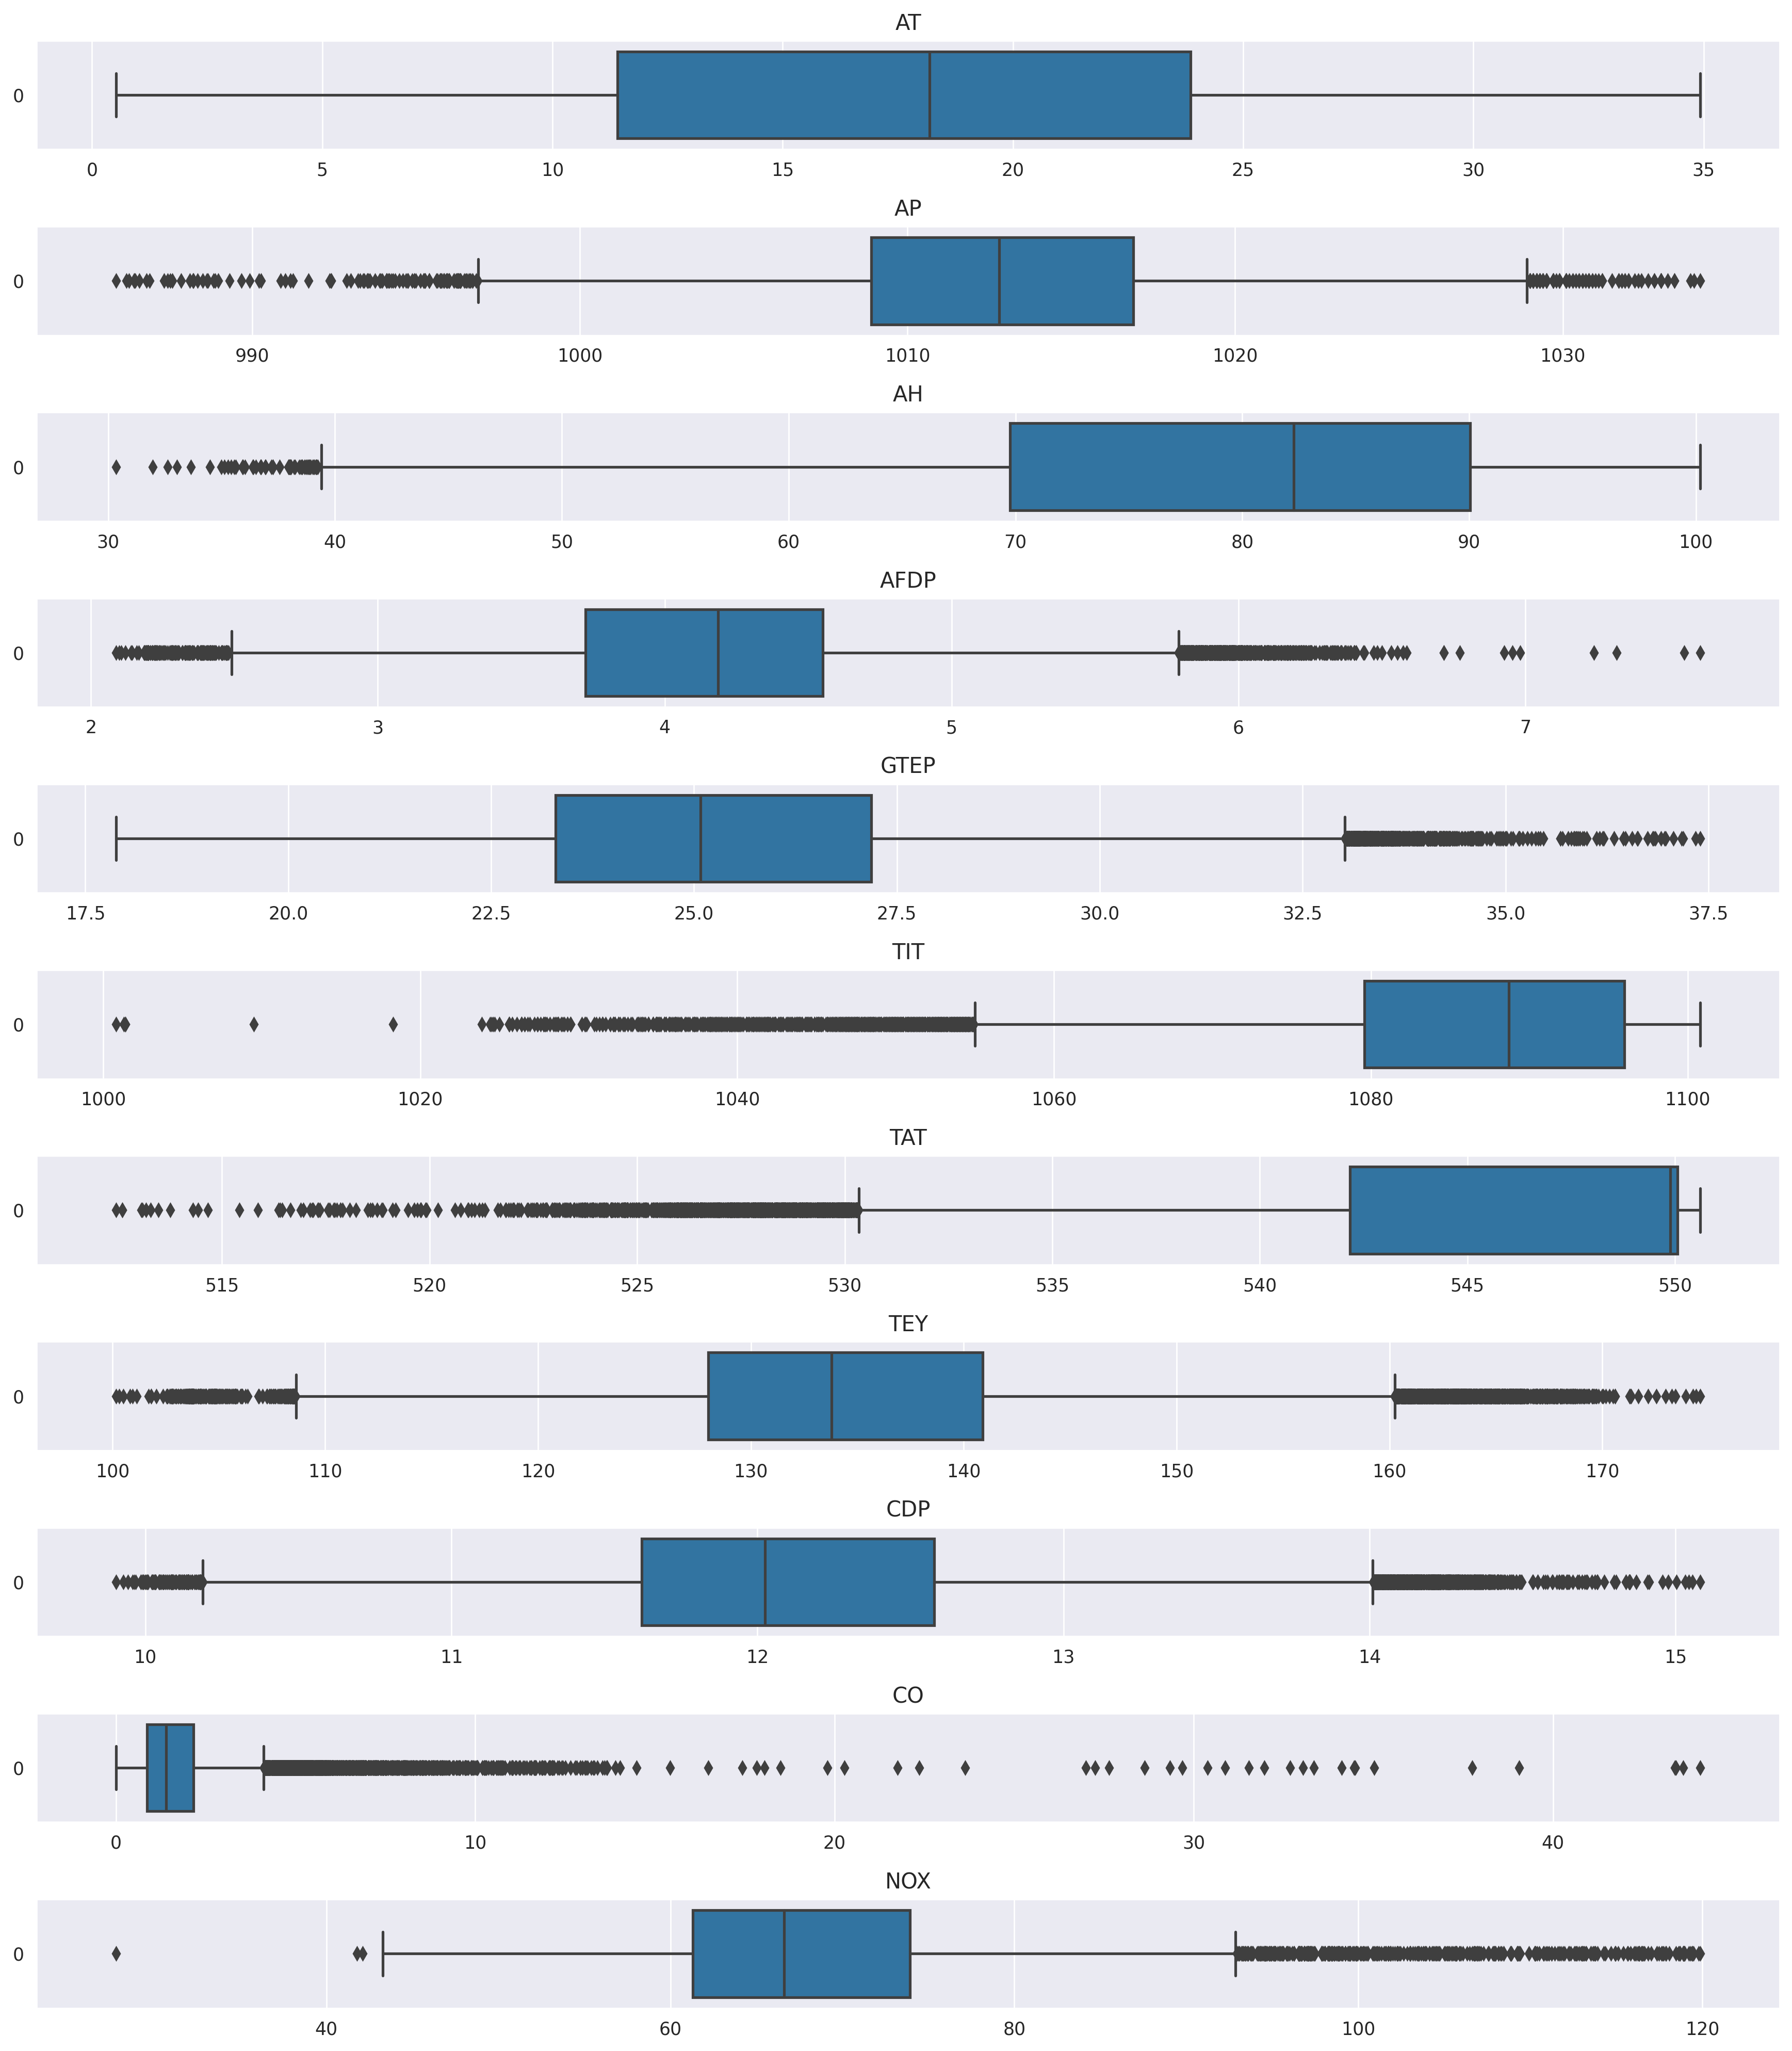

In [44]:
sns.set_style("darkgrid")

plt.subplot(11,1,1)
sns.boxplot(df['AT'],orient='h')
plt.title('AT')

plt.subplot(11,1,2)
sns.boxplot(df['AP'],orient='h')
plt.title('AP')

plt.subplot(11,1,3)
sns.boxplot(df['AH'],orient='h')
plt.title('AH')

plt.subplot(11,1,4)
sns.boxplot(df['AFDP'],orient='h')
plt.title('AFDP')

plt.subplot(11,1,5)
sns.boxplot(df['GTEP'],orient='h')
plt.title('GTEP')

plt.subplot(11,1,6)
sns.boxplot(df['TIT'],orient='h')
plt.title('TIT')

plt.subplot(11,1,7)
sns.boxplot(df['TAT'],orient='h')
plt.title('TAT')

plt.subplot(11,1,8)
sns.boxplot(df['TEY'],orient='h')
plt.title('TEY')

plt.subplot(11,1,9)
sns.boxplot(df['CDP'],orient='h')
plt.title('CDP')

plt.subplot(11,1,10)
sns.boxplot(df['CO'],orient='h')
plt.title('CO')

plt.subplot(11,1,11)
sns.boxplot(df['NOX'],orient='h')
plt.title('NOX')

plt.tight_layout()

In [45]:
x = df.drop('TEY', axis=1)
y = df[["TEY"]]
sc = StandardScaler()
x = sc.fit_transform(x)

In [46]:
xtrain, xtest, ytrain, ytest = train_test_split(x,
                                                y,
                                                test_size=0.25,
                                                random_state=2)

In [47]:
# Initialize ann model
ann = Sequential()

# Add hidden data
ann.add(Dense(units=30, activation='relu'))
ann.add(Dense(units=20, activation='relu'))
ann.add(Dense(units=30, activation='relu'))

# Add output layer
ann.add(Dense(units=1))

# Establish the connection between Layers
ann.compile(optimizer='adam', loss='mse',metrics=['mae'])

# Fit data
history = ann.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=250)
loss = history.history['loss']

# Make Predictions
ypred = ann.predict(xtest)
ypred

Epoch 1/250
353/353 [==============================] - 3s 4ms/step - loss: 5710.9951 - mae: 57.2767 - val_loss: 384.1087 - val_mae: 15.5529
Epoch 2/250
353/353 [==============================] - 1s 2ms/step - loss: 247.7979 - mae: 12.1632 - val_loss: 155.9360 - val_mae: 9.3884
Epoch 3/250
353/353 [==============================] - 1s 4ms/step - loss: 117.7182 - mae: 8.0079 - val_loss: 86.0408 - val_mae: 6.6824
Epoch 4/250
353/353 [==============================] - 1s 4ms/step - loss: 68.8708 - mae: 5.9773 - val_loss: 53.3079 - val_mae: 5.1736
Epoch 5/250
353/353 [==============================] - 1s 3ms/step - loss: 43.7892 - mae: 4.6554 - val_loss: 33.8247 - val_mae: 4.0021
Epoch 6/250
353/353 [==============================] - 1s 2ms/step - loss: 28.6026 - mae: 3.6908 - val_loss: 22.7783 - val_mae: 3.2451
Epoch 7/250
353/353 [==============================] - 1s 2ms/step - loss: 19.4205 - mae: 2.9978 - val_loss: 15.2815 - val_mae: 2.6133
Epoch 8/250
353/353 [=========================

array([[132.59491],
       [163.98112],
       [155.48384],
       ...,
       [133.37485],
       [134.05392],
       [156.43768]], dtype=float32)

In [48]:
plt.rcParams['figure.figsize'] = 14,7
plt.rcParams['figure.dpi'] = 250
plt.show()

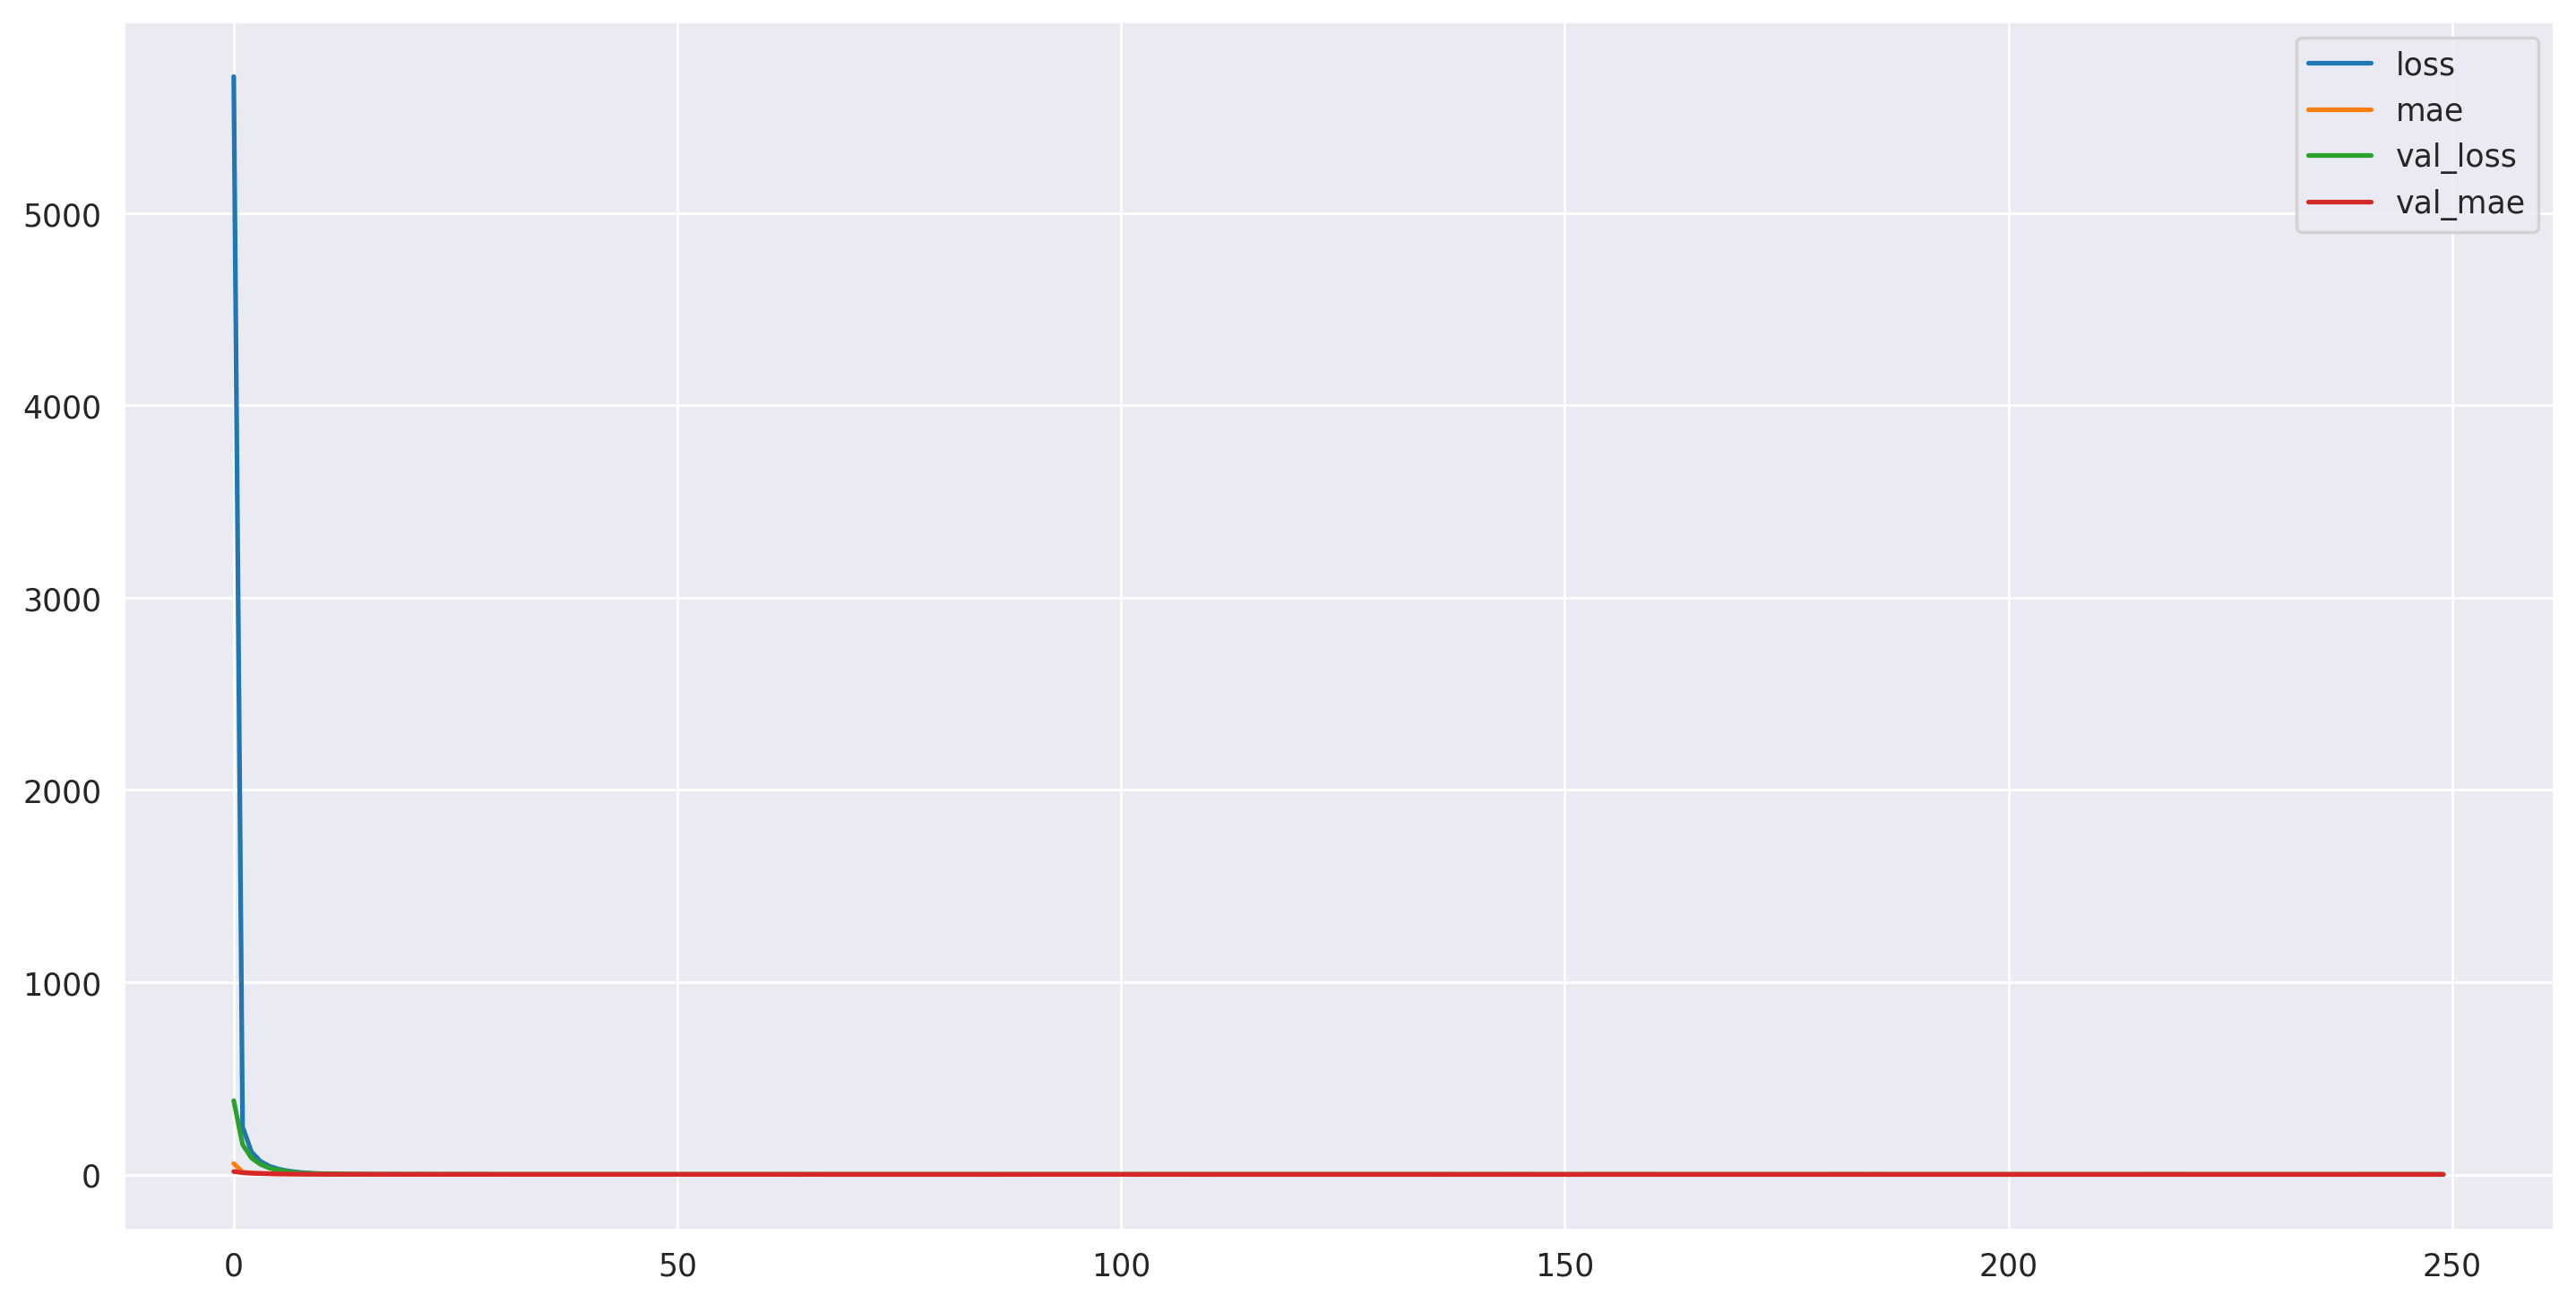

In [49]:
Validation_loss = pd.DataFrame(history.history)
plt.plot(Validation_loss)
plt.legend(Validation_loss)

In [50]:
# Early Stopping

# Initialize ann model
ann = Sequential()

# Add hidden data
ann.add(Dense(units=30, activation='relu'))
ann.add(Dense(units=20, activation='relu'))
ann.add(Dense(units=30, activation='relu'))

# Add output layer
ann.add(Dense(units=1))

# Establish the connection between Layers
ann.compile(optimizer='adam', loss='mse',metrics=['mae'])

# Fit data
history = ann.fit(xtrain, ytrain,callbacks=[early], validation_data=(xtest, ytest), epochs=250)
loss = history.history['loss']

# Make Predictions
ypred = ann.predict(xtest)

Epoch 1/250
353/353 [==============================] - 2s 3ms/step - loss: 5746.6646 - mae: 56.7502 - val_loss: 316.0753 - val_mae: 13.8487
Epoch 2/250
353/353 [==============================] - 1s 2ms/step - loss: 206.7390 - mae: 10.9250 - val_loss: 131.1584 - val_mae: 8.5051
Epoch 3/250
353/353 [==============================] - 1s 2ms/step - loss: 103.4914 - mae: 7.4183 - val_loss: 78.8867 - val_mae: 6.3527
Epoch 4/250
353/353 [==============================] - 1s 3ms/step - loss: 66.0677 - mae: 5.6916 - val_loss: 53.2844 - val_mae: 5.0077
Epoch 5/250
353/353 [==============================] - 1s 3ms/step - loss: 45.6896 - mae: 4.6129 - val_loss: 37.3478 - val_mae: 4.0910
Epoch 6/250
353/353 [==============================] - 1s 3ms/step - loss: 31.7403 - mae: 3.8065 - val_loss: 25.9299 - val_mae: 3.4030
Epoch 7/250
353/353 [==============================] - 1s 3ms/step - loss: 21.8748 - mae: 3.1849 - val_loss: 18.6780 - val_mae: 2.9644
Epoch 8/250
353/353 [=========================

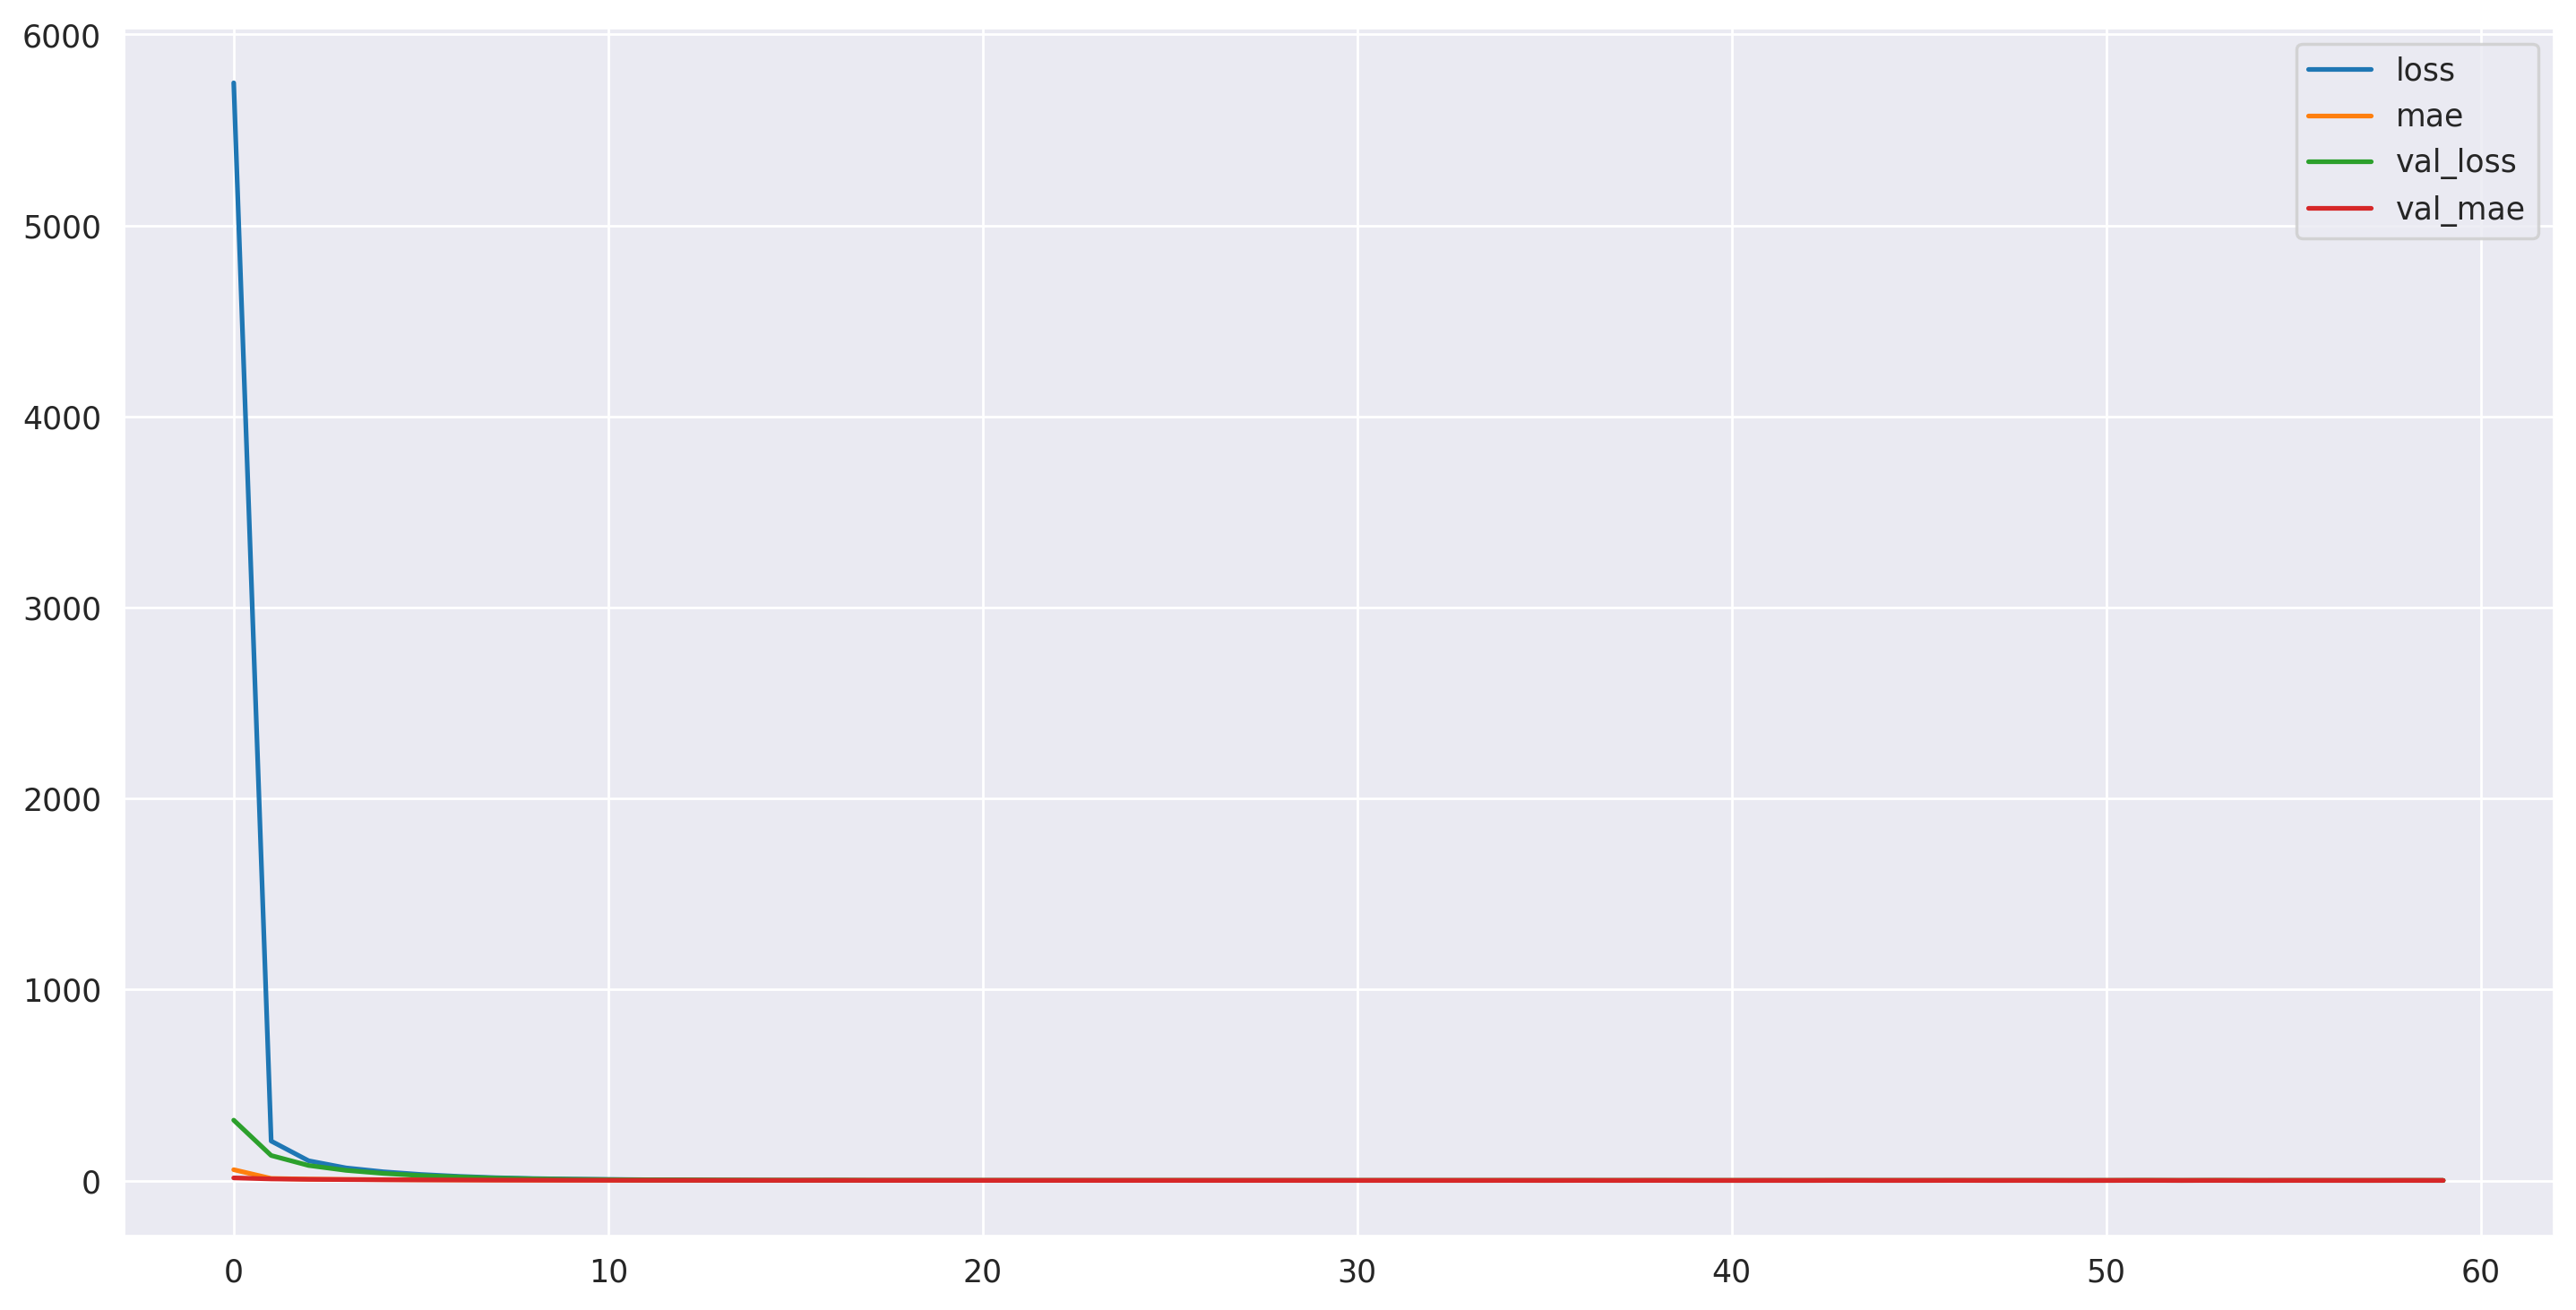

In [51]:
early_loss = pd.DataFrame(history.history)
plt.plot(early_loss)
plt.legend(early_loss)

In [52]:
# Drop out Layer

# Initialize ann model
ann = Sequential()

# Add hidden data
ann.add(Dense(units=30, activation='relu'))
ann.add(Dropout(rate=0.50))
ann.add(Dense(units=20, activation='relu'))
ann.add(Dropout(rate=0.50))
ann.add(Dense(units=30, activation='relu'))
ann.add(Dropout(rate=0.50))

# Add output layer
ann.add(Dense(units=1))

# Establish the connection between Layers
ann.compile(optimizer='adam', loss='mse',metrics=['mae'])

# Fit data
history = ann.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=500)
loss = history.history['loss']

# Make Predictions
ypred = ann.predict(xtest)

Epoch 1/500
353/353 [==============================] - 2s 4ms/step - loss: 8256.8721 - mae: 78.8100 - val_loss: 793.5410 - val_mae: 24.9743
Epoch 2/500
353/353 [==============================] - 2s 4ms/step - loss: 2942.7676 - mae: 44.5357 - val_loss: 458.6592 - val_mae: 19.0000
Epoch 3/500
353/353 [==============================] - 1s 3ms/step - loss: 2572.6067 - mae: 41.6783 - val_loss: 381.1031 - val_mae: 17.6401
Epoch 4/500
353/353 [==============================] - 1s 3ms/step - loss: 2363.3413 - mae: 39.6759 - val_loss: 356.1543 - val_mae: 17.2703
Epoch 5/500
353/353 [==============================] - 1s 3ms/step - loss: 2196.9927 - mae: 38.3047 - val_loss: 384.3678 - val_mae: 18.6211
Epoch 6/500
353/353 [==============================] - 1s 3ms/step - loss: 2004.4102 - mae: 36.4524 - val_loss: 225.6361 - val_mae: 14.0671
Epoch 7/500
353/353 [==============================] - 1s 3ms/step - loss: 1926.7644 - mae: 35.6476 - val_loss: 201.4511 - val_mae: 13.4472
Epoch 8/500
353/353 

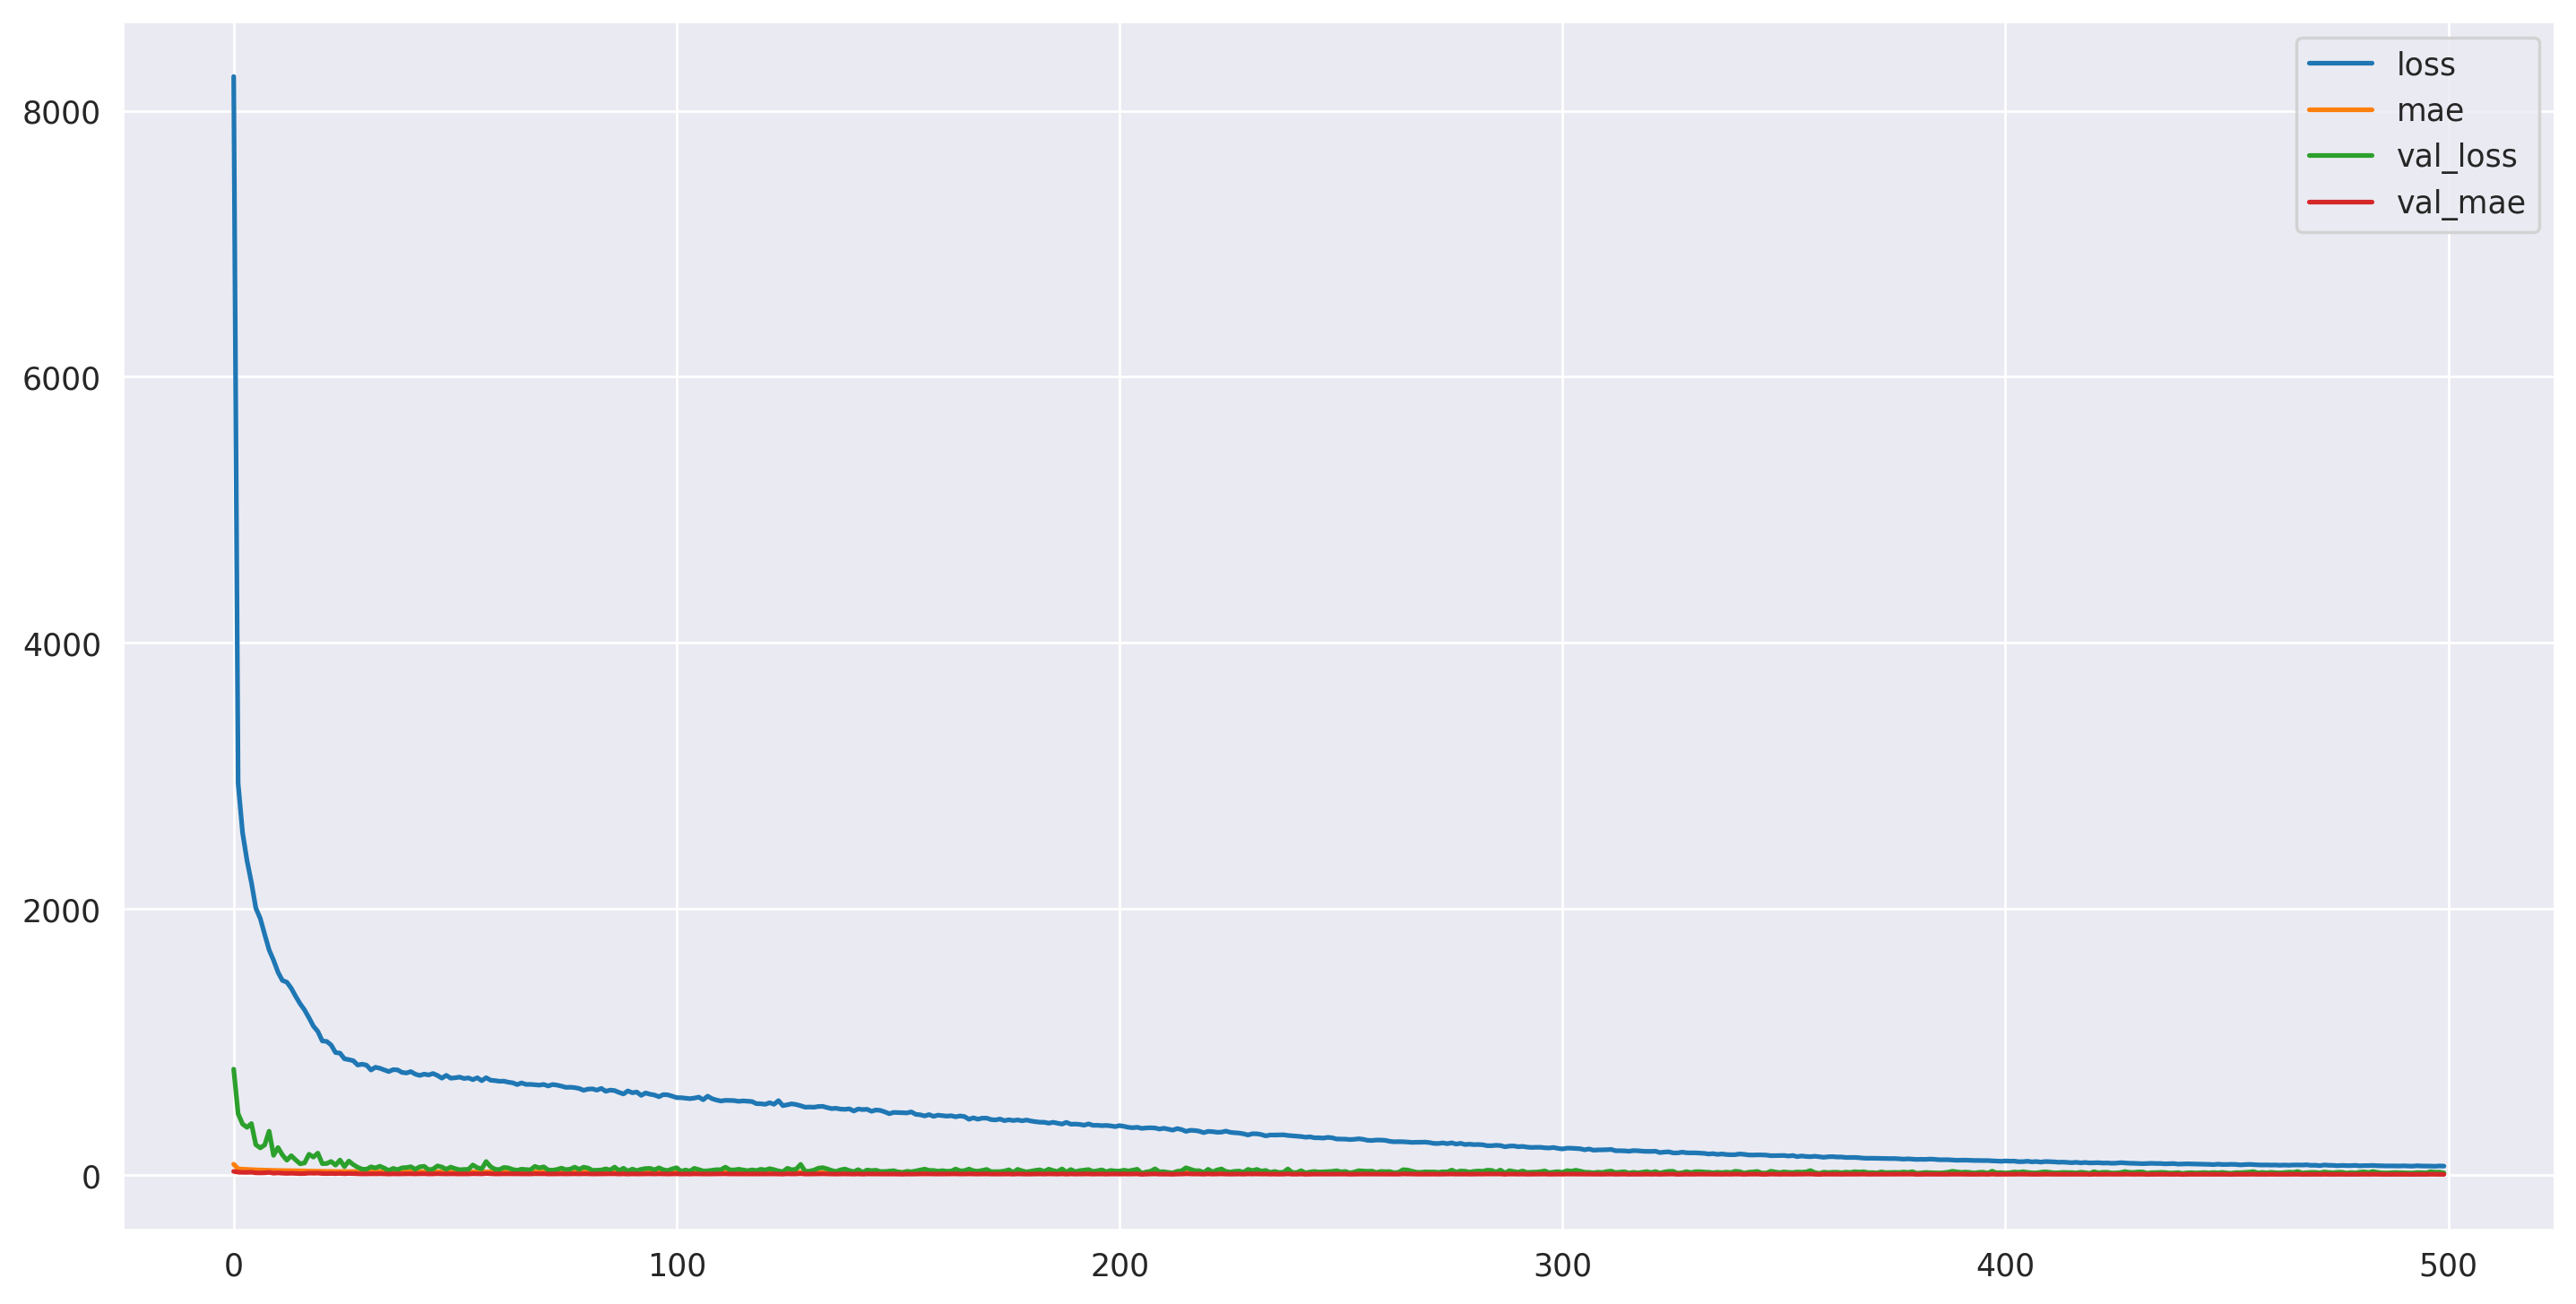

In [53]:
drop_loss = pd.DataFrame(history.history)
plt.plot(drop_loss)
plt.legend(drop_loss)

In [54]:
# Drop out Layer + Early Stopper

# Initialize ann model
ann = Sequential()

# Add hidden data
ann.add(Dense(units=30, activation='relu'))
ann.add(Dropout(rate=0.50))
ann.add(Dense(units=20, activation='relu'))
ann.add(Dropout(rate=0.50))
ann.add(Dense(units=30, activation='relu'))
ann.add(Dropout(rate=0.50))

# Add output layer
ann.add(Dense(units=1))

# Establish the connection between Layers
ann.compile(optimizer='adam', loss='mse',metrics=['mae'])

# Fit data
history = ann.fit(xtrain, ytrain,callbacks=[early], validation_data=(xtest, ytest), epochs=250)
loss = history.history['loss']

# Make Predictions
ypred = ann.predict(xtest)

Epoch 1/250
353/353 [==============================] - 2s 3ms/step - loss: 8521.9609 - mae: 80.5170 - val_loss: 851.1821 - val_mae: 25.0505
Epoch 2/250
353/353 [==============================] - 1s 3ms/step - loss: 3008.0085 - mae: 45.1656 - val_loss: 488.4281 - val_mae: 19.5528
Epoch 3/250
353/353 [==============================] - 1s 3ms/step - loss: 2602.8594 - mae: 41.7211 - val_loss: 327.7803 - val_mae: 16.0551
Epoch 4/250
353/353 [==============================] - 1s 2ms/step - loss: 2300.7227 - mae: 39.2119 - val_loss: 325.1494 - val_mae: 16.3974
Epoch 5/250
353/353 [==============================] - 1s 2ms/step - loss: 2066.8533 - mae: 36.9397 - val_loss: 322.1282 - val_mae: 16.9803
Epoch 6/250
353/353 [==============================] - 1s 2ms/step - loss: 1949.2469 - mae: 35.8086 - val_loss: 152.1691 - val_mae: 11.1832
Epoch 7/250
353/353 [==============================] - 1s 4ms/step - loss: 1774.3929 - mae: 34.0509 - val_loss: 213.1509 - val_mae: 13.9941
Epoch 8/250
353/353 

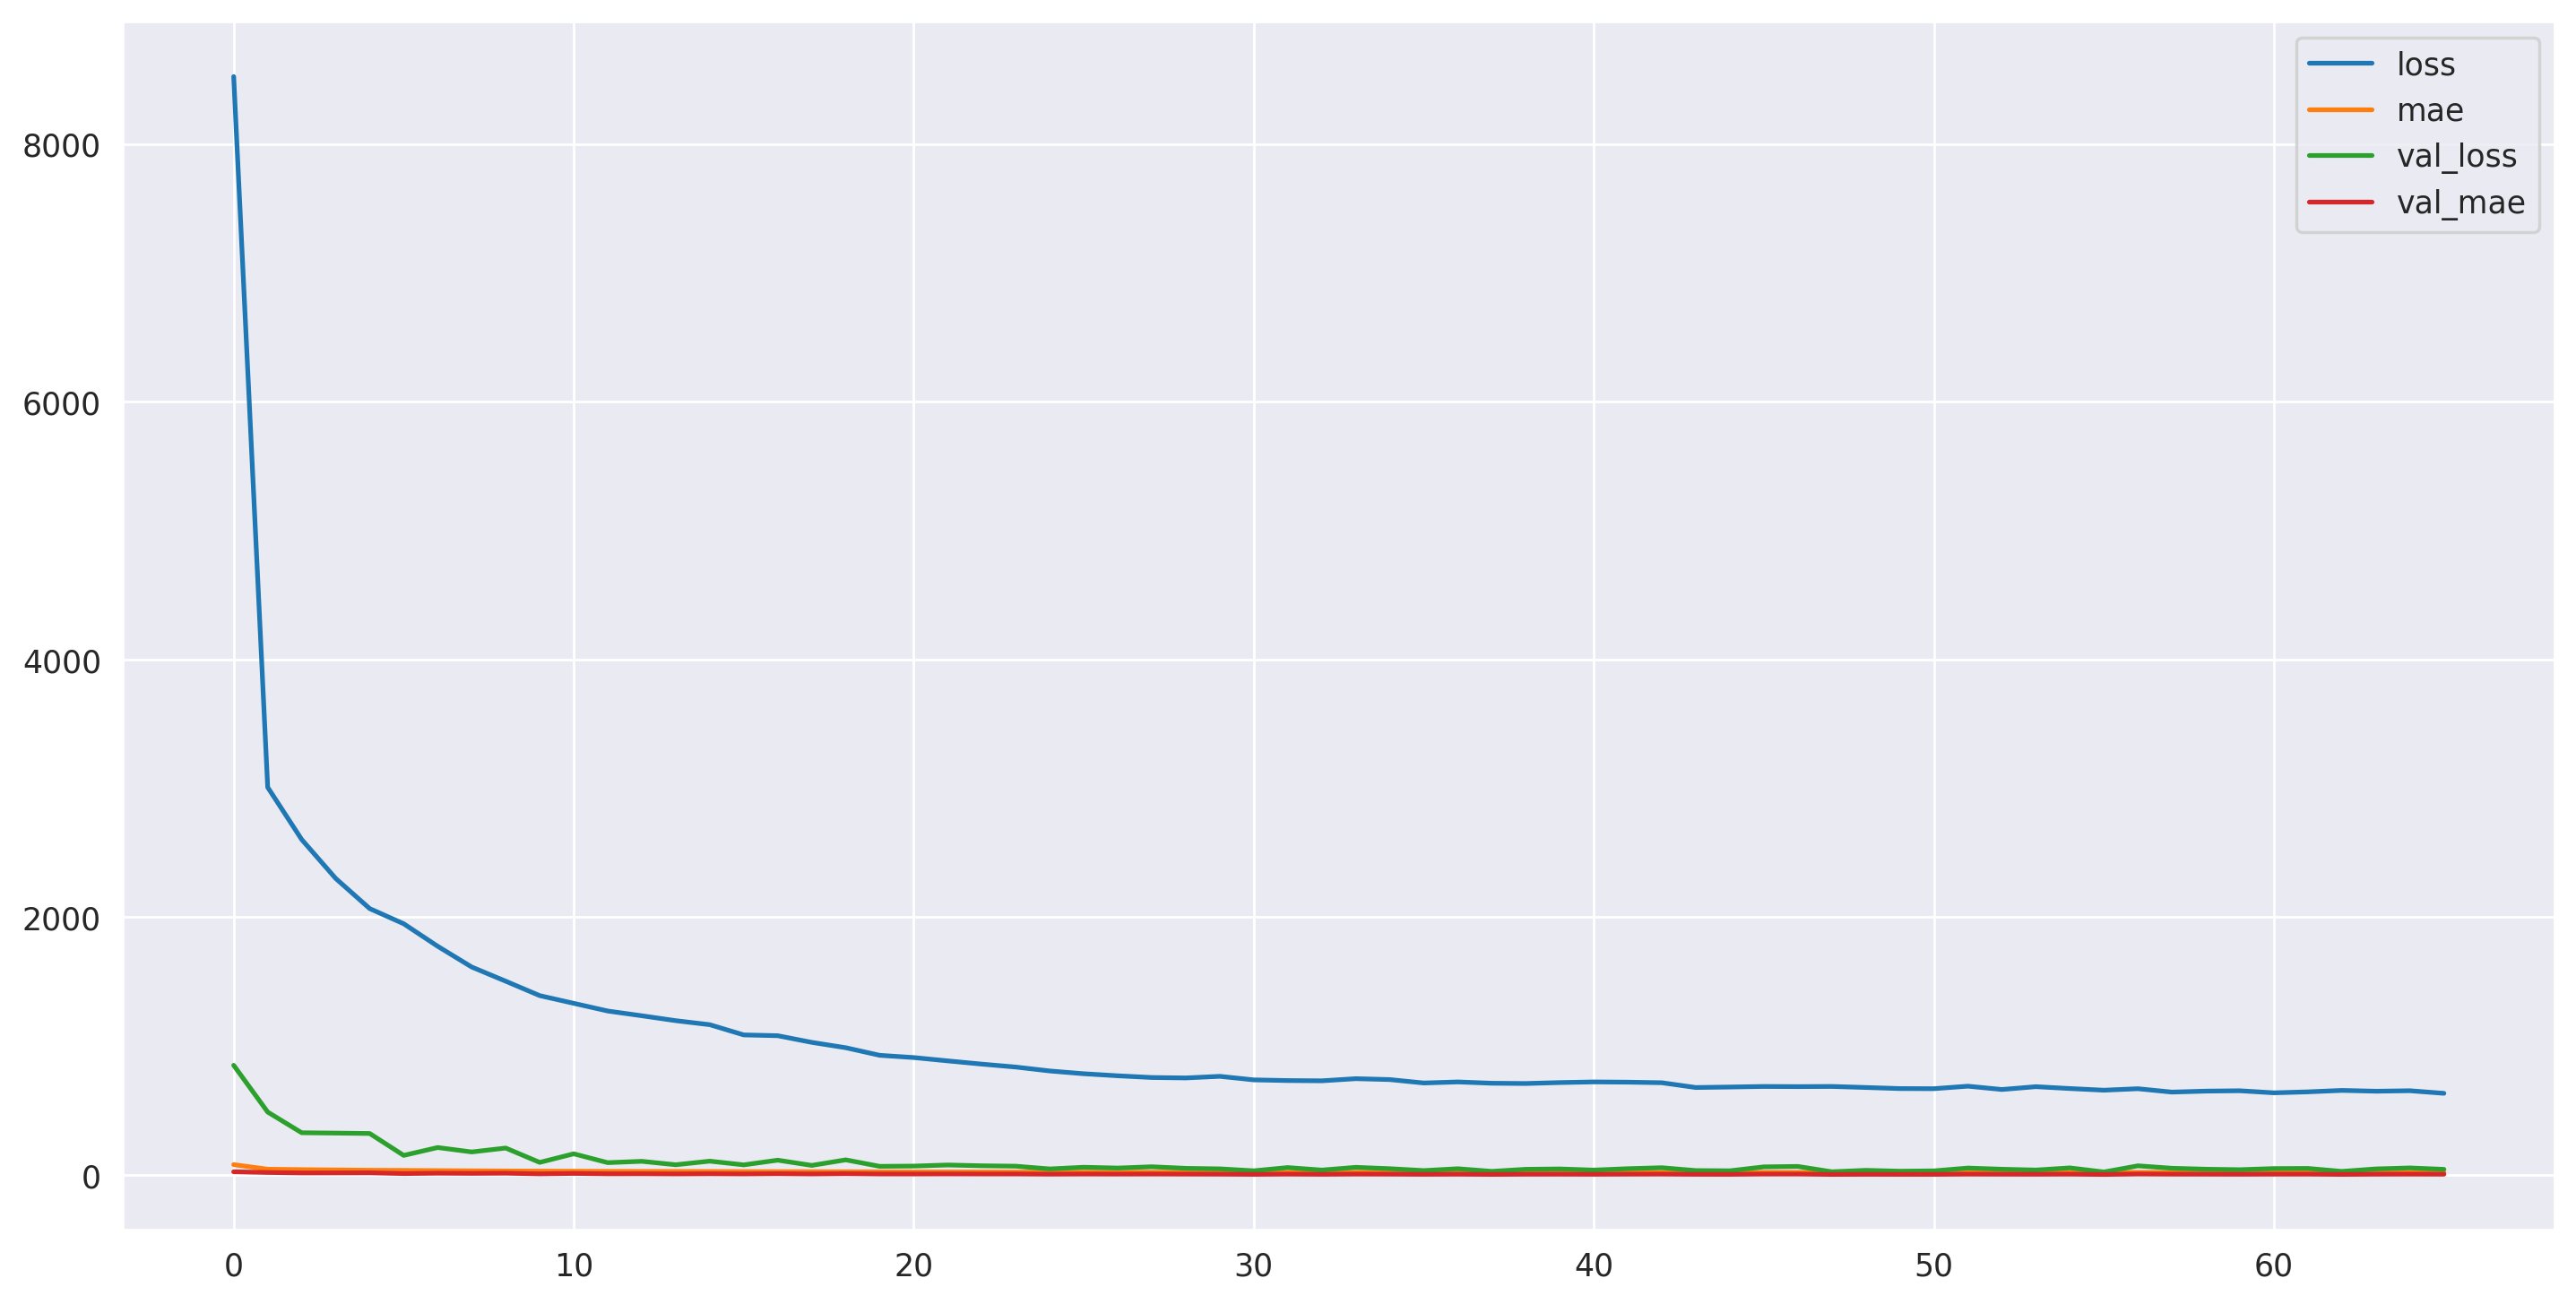

In [55]:
de_loss = pd.DataFrame(history.history)
plt.plot(de_loss)
plt.legend(de_loss)